In [27]:
!pip install pysal==2.7.0


  Using cached pysal-2.7.0-py3-none-any.whl (17 kB)
  Using cached momepy-0.5.3-py3-none-any.whl (243 kB)
  Using cached spopt-0.4.1-py3-none-any.whl (84 kB)
  Using cached segregation-2.3.1-py3-none-any.whl (147 kB)
  Using cached tobler-0.9.0-py3-none-any.whl (22 kB)
  Using cached rvlib-0.0.6.tar.gz (183 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached quilt3-5.0.0-py3-none-any.whl (78 kB)
     -------------------------------------- 132.5/132.5 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 6.0 MB/s eta 0:00:00
  Running setup.py clean for rvlib
Failed to build rvlib
  Attempting uninstall: botocore
    Found existing installation: botocore 1.27.71
    Uninstalling botocore-1.27.71:
      Successfully uninstalled botocore-1.27.71
  Running setup.py install for rvlib: started
  Running setup.py install for rvlib: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [26 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\rvlib
  copying rvlib\specials.py -> build\lib.win-amd64-3.8\rvlib
  copying rvlib\univariate.py -> build\lib.win-amd64-3.8\rvlib
  copying rvlib\version.py -> build\lib.win-amd64-3.8\rvlib
  copying rvlib\__init__.py -> build\lib.win-amd64-3.8\rvlib
  running egg_info
  writing rvlib.egg-info\PKG-INFO
  writing dependency_links to rvlib.egg-info\dependency_links.txt
  writing requirements to rvlib.egg-info\requires.txt
  writing top-level names to rvlib.egg-info\top_level.txt
  reading manifest file 'rvlib.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE.txt'
  writing manifest file 'rvlib.egg-info\SOURCES.txt'
  copying rvlib\metadata.yaml -> build\lib.win-amd64

In [ ]:
!pip install spreg

In [ ]:
!pip install mapclassify 

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install fiona

In [26]:
! pip install geopandas

In [ ]:
!pip install fiona

In [ ]:
!pip install spreg


In [ ]:
!pip install pysal spreg

In [ ]:
!pip install spreg

In [28]:
import os
import pandas as pd
import numpy as np
import fiona
import shapely
from shapely.geometry import Point, Polygon
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
%matplotlib inline
from geopandas import GeoDataFrame
from scipy import stats
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster
import pysal
from pysal.spreg import ols
from pysal.spreg import ml_error
from pysal.spreg import ml_lag


ModuleNotFoundError: No module named 'pysal.spreg'

In [ ]:
#Read the data

In [9]:
imd=pd.read_csv('C:\\Users\\zahra\\Desktop\\programming_projectpp\\crime_data_NI.csv')
# use TextFileReader iterable with chunks of 100,000 rows.
tp = pd.read_csv('C:\\Users\\zahra\\Desktop\\programming_projectpp\\crime_data_NI.csv', iterator=True, chunksize=100000)  
crime_data = pd.concat(tp, ignore_index=True)  
# print data shape
crime_data.shape

(13640, 12)

In [10]:
imd.describe()

,Longitude,Latitude,LSOA code,LSOA name,Last outcome category,Context
count,13482.000000,13482.000000,0.0,0.0,0.0,0.0
mean,-6.273235,54.617281,NaN,NaN,NaN,NaN
std,0.523137,0.234035,NaN,NaN,NaN,NaN
min,-8.106383,54.026858,NaN,NaN,NaN,NaN
25%,-6.514310,54.504238,NaN,NaN,NaN,NaN
50%,-6.025781,54.597057,NaN,NaN,NaN,NaN
75%,-5.925360,54.710171,NaN,NaN,NaN,NaN
max,-5.450219,55.236302,NaN,NaN,NaN,NaN


In [ ]:
#Data cleaning for Crime Data

In [11]:
# view the basic stats on columns
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               9502 non-null   object 
 1   Month                  13640 non-null  object 
 2   Reported by            13640 non-null  object 
 3   Falls within           13640 non-null  object 
 4   Longitude              13482 non-null  float64
 5   Latitude               13482 non-null  float64
 6   Location               13640 non-null  object 
 7   LSOA code              0 non-null      float64
 8   LSOA name              0 non-null      float64
 9   Crime type             13640 non-null  object 
 10  Last outcome category  0 non-null      float64
 11  Context                0 non-null      float64
dtypes: float64(6), object(6)
memory usage: 1.2+ MB


In [12]:
crime_data.drop(['Context', 'Falls within','Reported by',  'Location','Last outcome category' ], inplace=True, axis=1)
# show dataframe columns
crime_data.columns

Index(['Crime ID', 'Month', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name',
       'Crime type'],
      dtype='object')

In [13]:
# Now check the name of the fields and rename the columns by more python recognized names...
colnames = ['ID','Month','lat','lon','code','name','type']
crime_data.columns = colnames
crime_data.head(4)

,ID,Month,lat,lon,code,name,type
0,NaN,2022-06,-6.331321,54.289037,NaN,NaN,Anti-social behaviour
1,NaN,2022-06,-6.794973,54.447499,NaN,NaN,Anti-social behaviour
2,NaN,2022-06,-6.336740,54.455013,NaN,NaN,Anti-social behaviour
3,NaN,2022-06,-7.287115,54.974280,NaN,NaN,Anti-social behaviour


In [14]:
# print all crime variables in the "type" column
crimes = crime_data['type'].sort_values().unique()
crimes, len(crimes)

(array(['Anti-social behaviour', 'Bicycle theft', 'Burglary',
        'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft',
        'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting',
        'Theft from the person', 'Vehicle crime',
        'Violence and sexual offences'], dtype=object),
 14)

In [15]:
# for examples, lets check out the column 'crime type'
crime_data.type.value_counts()

Violence and sexual offences    4716
Anti-social behaviour           4138
Criminal damage and arson       1429
Other theft                      837
Drugs                            661
Shoplifting                      647
Burglary                         327
Other crime                      270
Vehicle crime                    227
Possession of weapons            112
Public order                     100
Bicycle theft                     93
Robbery                           43
Theft from the person             40
Name: type, dtype: int64

In [ ]:
#Explore the most prevalent crime types

In [16]:
crime_data_group = crime_data.groupby('type').size().reset_index(name='count')
crime_data_sort = crime_data_group.sort_values(['count'], ascending=False).reset_index(drop=True)
crime_data_sort

,type,count
0,Violence and sexual offences,4716
1,Anti-social behaviour,4138
2,Criminal damage and arson,1429
3,Other theft,837
4,Drugs,661
5,Shoplifting,647
6,Burglary,327
7,Other crime,270
8,Vehicle crime,227
9,Possession of weapons,112


In [21]:

%matplotlib inline
from geopandas import GeoDataFrame
in_type=[crime_data_sort['type'][i]for i in range(3)]
fillcolors = ['#ff0000','#0000ff','#00ff00']
nlst = crime_data[crime_data.type.isin(in_type)].copy() 
nlst.shape

(10283, 7)

In [22]:
nlst['lon'].notnull().count() # check whether they all have longitude data
# Your code here to replace the ???
nlst['lat'].notnull().count() # check whether they all have latitude data

10283

In [29]:


new_gdb = gpd.GeoSeries(nlst[['lon', 'lat']].apply(Point, axis=1), crs="+init=epsg:4326")
bbox = new_gdb.total_bounds
titles=["Kernel Density: "+in_type[i] for i in range(3)]
    
fig, axs = plt.subplots(2, 2, figsize = (12,12))

ax1 = plt.subplot2grid((8,8), (0,0), rowspan=3, colspan=3) 
ax2 = plt.subplot2grid((8,8), (4,0), rowspan=3, colspan=3)
ax3 = plt.subplot2grid((8,8), (0,4), rowspan=3, colspan=3)


fig.tight_layout(pad = 0.4, w_pad = 4.0, h_pad = 4.0)
ax1.set_title(titles[0], fontsize =16)
ax2.set_title(titles[1], fontsize =16)
ax3.set_title(titles[2], fontsize =16)

ax1.set_xlim(bbox[0], bbox[2])
ax1.set_ylim(bbox[1], bbox[3]) 
ax2.set_xlim(bbox[0], bbox[2])
ax2.set_ylim(bbox[1], bbox[3]) 
ax3.set_xlim(bbox[0], bbox[2])
ax3.set_ylim(bbox[1], bbox[3]) 

# ^The above code sets the x and y limits for each function. Without this, the density maps
# are very small and only take up about 20% of the graph space.
gdfnew1 = nlst[nlst['type']==in_type[0]]
gdfnew2 = nlst[nlst['type']==in_type[1]]
gdfnew3 = nlst[nlst['type']==in_type[2]]

sns.kdeplot(gdfnew1.lon, gdfnew1.lat, shade = True, cmap = "Reds", ax=ax1) 
sns.kdeplot(gdfnew2.lon, gdfnew2.lat, shade = True, cmap = "Blues", ax=ax2)
sns.kdeplot(gdfnew3.lon, gdfnew3.lat, shade = True, cmap = "Greens", ax=ax3)

sns.set(style = "whitegrid") # aesthetics
sns.despine(left=True) # aesthetics
sns.set_context("paper") # aesthetics
plt.axis('equal')
plt.show()   

NameError: name 'gpd' is not defined

In [24]:
# Set up geodataframe, initially with CRS = WGS84 (since that matches the lon and lat co-ordinates)
crs = {'init':'epsg:4326'}
geometry = [shapely.geometry.Point(xy) for xy in zip(crime_data['lon'], crime_data['lat'])]
geo_df = gpd.GeoDataFrame(crime_data,
                               crs = crs,
                               geometry = geometry)
# Convert geometry to OSGB36 EPSG: 27700
geo_df_new = geo_df.to_crs(epsg = 27700)
# convert the .csv file into .shp file 
geo_df_new.to_file(driver='ESRI Shapefile', filename='crime_data.shp')

NameError: name 'gpd' is not defined

NameError: name 'geo_df_new' is not defined

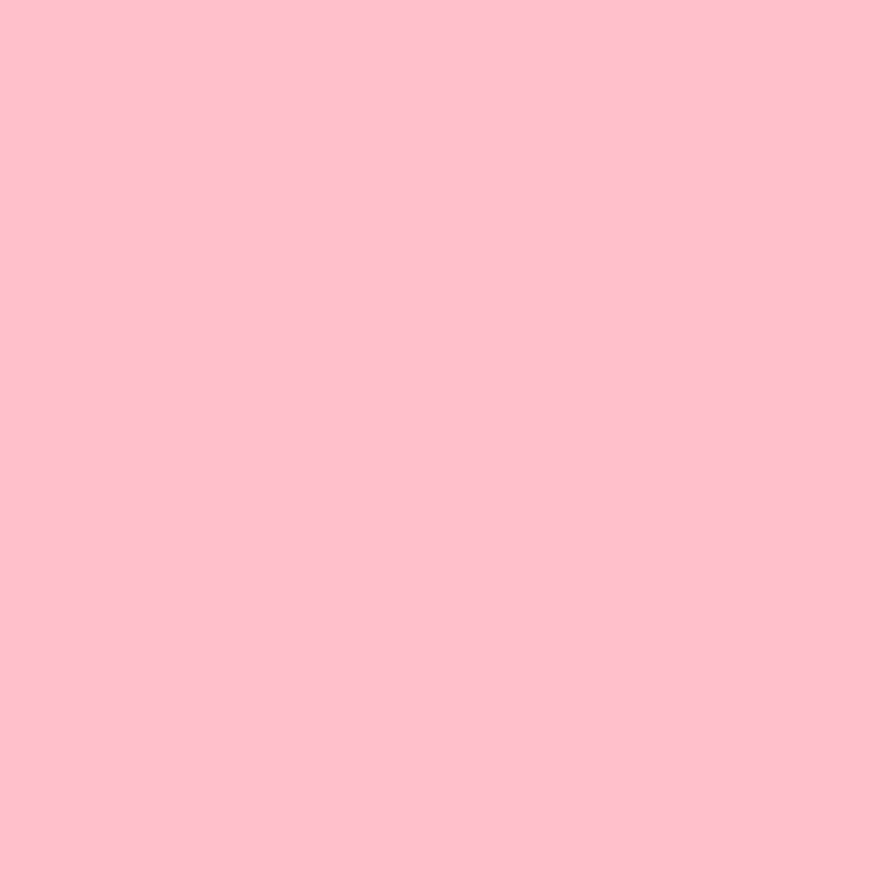

In [25]:
# Plot map
fig, ax = plt.subplots(1,
                       figsize = (12,12),
                       dpi = 72,
                       facecolor = 'pink')

ax.set_position([0,0,1,1])   # Puts axis to edge of figure
ax.set_axis_off()            # Turns axis off so facecolour applies to axis area as well as bit around the outside
ax.get_xaxis().set_visible(False)   # Turns the x axis off so that 'invisible' axis labels don't take up space
ax.get_yaxis().set_visible(False)
lims = plt.axis('equal')
geo_df_new.plot(ax=ax)
plt.show()

In [ ]:
crime_data.head(4)

In [ ]:
#importing the polygon map for LGDs

In [ ]:
# draw the LSOA map and set its Coordinate Reference Systems (CRS) into EPSG: 27700.
shapelgd=gpd.read_file('C:\\Users\\zahra\\Desktop\\programming_projectpp\\shapelgd.shp')
f, ax = plt.subplots(1, figsize=(12, 12))
ax = lsoa.plot(axes=ax);
shapelgd.crs = {'init' :'epsg:27700'}
plt.show()

In [ ]:
# check the lsoa is a GeoDataFrame
type(shapelgd)

In [ ]:
# check the labels for columns in lsoa
shapelgd.columns

In [ ]:
# make the columns for LSOA data more readable
# rename the indicator with full title to help you interpret the columns/indicators
lsoa.drop(['objectid', 'lsoa11nmw','st_areasha', 'st_lengths', 'IMD2015_LS', 'IMD2015__1', 'IMD2015_Lo'], inplace=True, axis=1)
colnames2 = ['code','name','IMDindex','Income','Employment','Education', 'Health','Subcrime','BarriersHou','LivEnviron','Affect_child', 'Affect_old', 'child_young','Adult_skill','Geobarrier','widerbarrier','indoors', 'outdoors','population','depend_child', 'peo_middle', 'peo_over60', 'work_age','geometry']
lsoa.columns = colnames2
lsoa.head(4)

In [ ]:
# to visulize both crime points data and lsoa vector data on a map
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_axis_off()
plt.axis('equal')
lsoa.plot(ax=ax, cmap='OrRd', linewidth=0.5, edgecolor='white')
geo_df_new.plot(column='type', markersize=3, categorical=True, legend=True, ax=ax)
# the legend was set by default to take the first column as labels.

In [ ]:
#chloropleth for deprivation index

In [30]:
# Make a Choropleth maps on the deprivation index.
shapelgd.plot(column='pc_emp_dep', cmap='OrRd', scheme='quantiles')

NameError: name 'shapelgd' is not defined

In [ ]:
# Please plot series quantile map for 3 sub domain of deprivation indexes you want to explore
# e.g. Income, Employment, Education, etc.
# Your code here
shapelgd.plot(column='popn_dens', cmap='OrRd', scheme='quantiles')

In [ ]:
shapelgd.plot(column='pc_emp_dep', cmap='OrRd', scheme='quantiles')

In [ ]:
shapelgd.plot(column='age18_64', cmap='OrRd', scheme='quantiles')

In [ ]:
# Make a Choropleth map on crime incidents per lsoa.
lsoa.plot(column='Numbers', cmap='coolwarm', scheme='quantiles')

In [ ]:
#crime heat map

In [31]:
crime_data['lat'] = crime_data['lat'].astype(float)
crime_data['lon'] = crime_data['lon'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = crime_data[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

heatmap_map = folium.Map([51.50632, -0.1271448], zoom_start=12)

# Plot it on the map
hm=plugins.HeatMap(heat_data)
heatmap_map.add_child(hm)
# You save a map as an html file 
heatmap_map.save("heatmap.html")